# SSVEP Classification :

This notebook uses already-implemented functions and classes, presented in "SSVEP1.py"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from SSVEP1 import SsvepLoading,TrialsBuilding,Classify
from estimation import Covariances, huber_param_second_method, huber_param_first_method
from pyriemann.estimation import Covariances as COV

In [2]:
#1. Load data

data_path = 'ssvep_exo/'
subj_list,records = SsvepLoading(data_path)

In [3]:
records

{0: ['subject01_run1', 'subject01_run2'],
 1: ['subject02_run1', 'subject02_run2'],
 2: ['subject03_run1', 'subject03_run2'],
 3: ['subject04_run1', 'subject04_run2'],
 4: ['subject05_run1', 'subject05_run2'],
 5: ['subject06_run1', 'subject06_run2'],
 6: ['subject07_run1', 'subject07_run2', 'subject07_run3'],
 7: ['subject08_run1', 'subject08_run2'],
 8: ['subject09_run1', 'subject09_run2'],
 9: ['subject10_run1', 'subject10_run2', 'subject10_run3', 'subject10_run4'],
 10: ['subject11_run1', 'subject11_run2'],
 11: ['subject12_run1',
  'subject12_run2',
  'subject12_run3',
  'subject12_run4',
  'subject12_run5']}

In [4]:
def fill_dict(results,subject,tmin,tmax,freq_band,train_acc,test_acc,nb_trains,estimator):
    results['subject'].append(subject)
    results['tmin'].append(tmin)
    results['tmax'].append(tmax)
    results['freq_band'].append(freq_band)
    results['mean train score'].append(np.mean(train_acc))
    results['mean test score'].append(np.mean(test_acc))
    results['nb all sessions'].append(len(records[subject]))
    results['nb sessions for train'].append(nb_trains)
    results['estimator'].append(estimator)
    return results


##  1- Effect of the offset (tmin)

Classification model: we kept n-1 sessions for training and we did a cross validation such that we take the avreage of accuracies of all possible training sets (ie n possibilities if we have in total n sessions for a given subject).
NB : Seesions were not mixed before classifying

In [22]:
results =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
with_shuffle = False
tmax=5
tmins = [0+0.5*i for i in range(5)]# from 0 to 2


for subject in range(len(subj_list)):
    nb_trains = len(records[subject])-1
    print("--------------",subj_list[subject],"--------------")
    for tmin in tmins:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="scm")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc1,test_acc1 = classif1.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"scm")
        print("scm done")
        
        COVS2 = Covariances(estimator="student",ddl=5)
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"student5")
        print("student5 done")
        
        COVS2bis = Covariances(estimator="student",ddl=3)
        COVS2bis.fit(extended_trials,labels)
        covs2bis = COVS2bis.transform(extended_trials)
        classif2bis = Classify(method,covs2bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2bis,test_acc2bis = classif2bis.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc2bis,test_acc2bis,nb_trains,"student3")
        print("student3 done")
        
        COVS4 = Covariances(estimator="huber",adaptive=True)
        COVS4.fit(extended_trials,labels)
        covs4 = COVS4.transform(extended_trials)
        classif4 = Classify(method,covs4,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4,test_acc4 = classif4.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc4,test_acc4,nb_trains,"huber adapt")
        print("huber adaptive done")
        
        COVS4bis = Covariances(estimator="huber",adaptive=False)
        COVS4bis.fit(extended_trials,labels)
        covs4bis = COVS4bis.transform(extended_trials)
        classif4bis = Classify(method,covs4bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4bis,test_acc4bis = classif4bis.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc4bis,test_acc4bis,nb_trains,"huber non adapt")
        print("huber non adaptive done")
        
        COVS3 = Covariances(estimator="tyler",adaptive=True)
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler")
        print("tyler done")
        
        

        

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs


Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
-------------- subject04 --------------
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 ev

    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
stu

Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done

Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
scm done

Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  

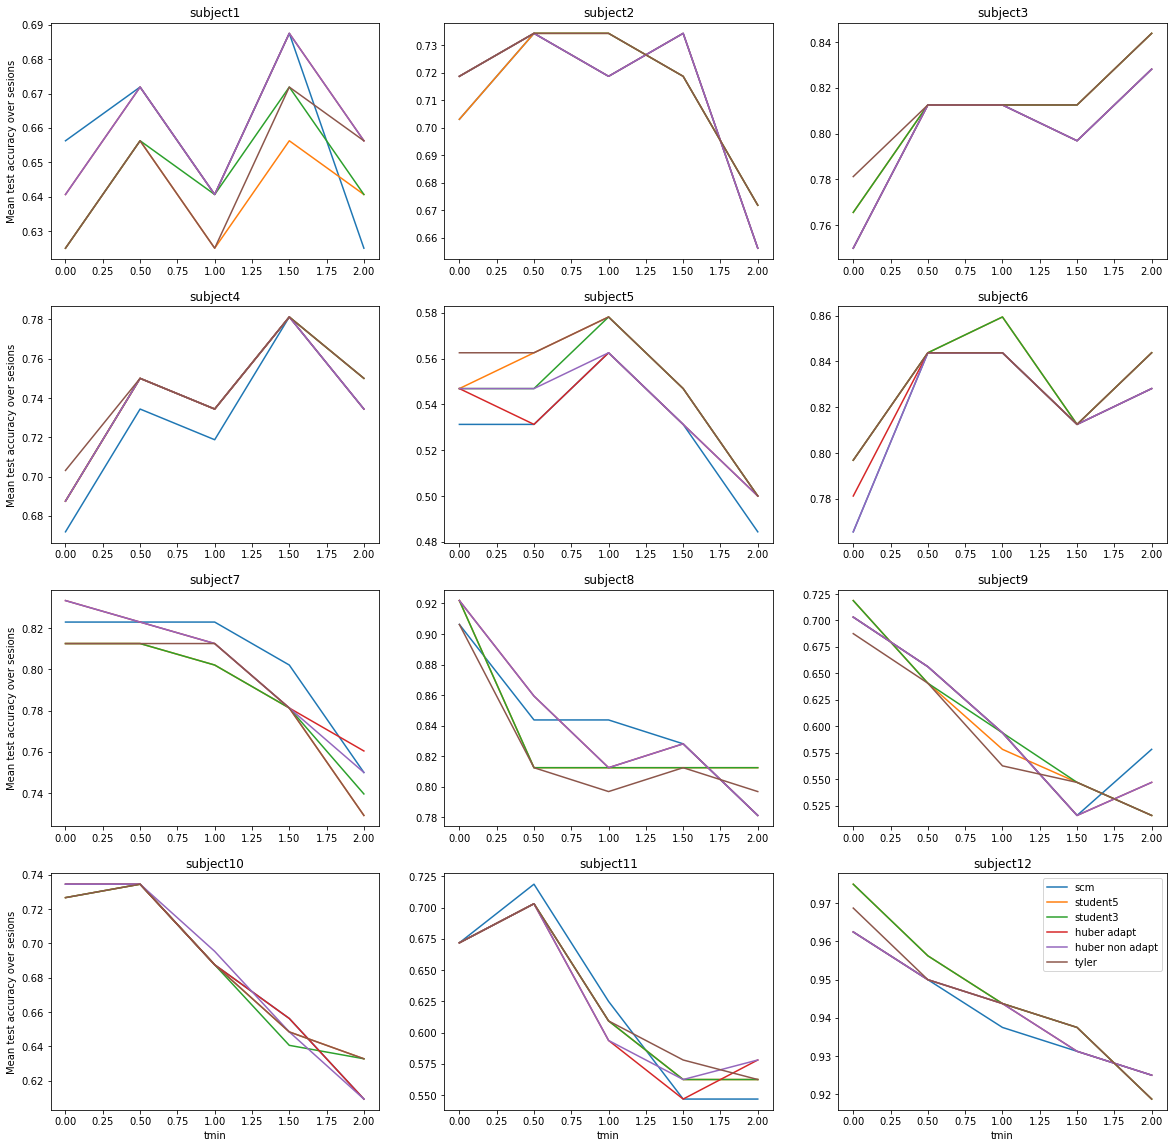

In [51]:
#plot
df = pd.DataFrame(results)
estimators = ["scm","student5","student3","huber adapt","huber non adapt","tyler"]
s = len(tmins)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flatten()
all_subjects = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(tmins))]
        all_subjects[(i,k)] = y
        axs[i].plot(tmins,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("tmin")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()
        
        

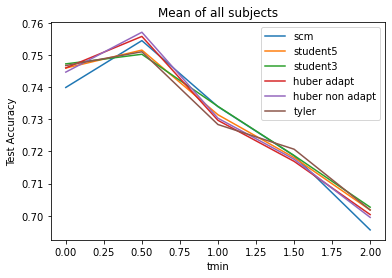

In [52]:
mean_acc = [[all_subjects[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(tmins,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("tmin")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

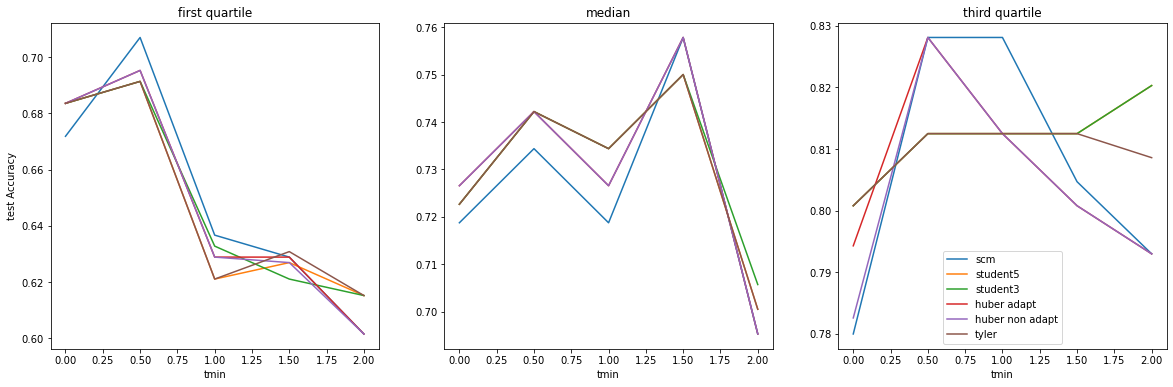

In [59]:
quartiles = np.zeros((3,len(estimators),len(tmins)))

for k in range(len(tmins)):
    for j in range(len(estimators)):
        y = mean_acc[:,j,k]
        q1,m,q2 = np.percentile(y, [25, 50, 75])
        quartiles[1,j,k] = m
        quartiles[0,j,k] = q1
        quartiles[2,j,k] = q2

quart = ["first quartile","median","third quartile"]
        
fig,axs = plt.subplots(1,3,figsize=(20,6))
axs = axs.flatten()
for i in range(3):
    for j in range(len(estimators)):
        axs[i].plot(tmins,[quartiles[i,j,k] for k in range(len(tmins))],label = estimators[j])
        axs[i].set_title(quart[i])
        axs[i].set_xlabel("tmin")
axs[0].set_ylabel('test Accuracy')
    
plt.legend()

## 2- Effect of the train proportion 

Classification model: if $p$ is the training proportion and $N$ is the total number of sessions for the considered subject, then we first mix sessions and shuffle them and then we took the first $p\times N$ for training. We repeated this operation several times (the number of repetion is kfold in the code) and we average the results.

In [37]:
results1 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 2
nb_trains = 0
train_props = [0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9]

for subject in range(len(subj_list)):
    
    print("--------------",subj_list[subject],"--------------")
    for train_prop in train_props:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="scm")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc1,test_acc1 = classif1.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"scm")
        print("scm done")
        
        COVS2 = Covariances(estimator="student",ddl=5)
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"student5")
        print("student5 done")
        
        COVS2bis = Covariances(estimator="student",ddl=3)
        COVS2bis.fit(extended_trials,labels)
        covs2bis = COVS2bis.transform(extended_trials)
        classif2bis = Classify(method,covs2bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2bis,test_acc2bis = classif2bis.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc2bis,test_acc2bis,nb_trains,"student3")
        print("student3 done")
        
        COVS4 = Covariances(estimator="huber",adaptive=True)
        COVS4.fit(extended_trials,labels)
        covs4 = COVS4.transform(extended_trials)
        classif4 = Classify(method,covs4,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4,test_acc4 = classif4.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc4,test_acc4,nb_trains,"huber adapt")
        print("huber adaptive done")
        
        COVS4bis = Covariances(estimator="huber",adaptive=False)
        COVS4bis.fit(extended_trials,labels)
        covs4bis = COVS4bis.transform(extended_trials)
        classif4bis = Classify(method,covs4bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4bis,test_acc4bis = classif4bis.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc4bis,test_acc4bis,nb_trains,"huber non adapt")
        print("huber non adaptive done")
        
        COVS3 = Covariances(estimator="tyler",adaptive=True)
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results1 = fill_dict(results1,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler")
        print("tyler done")
         

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs


Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done

Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
t

Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    

Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
t

student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =  

Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Openin

Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not 

Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak no

Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Open

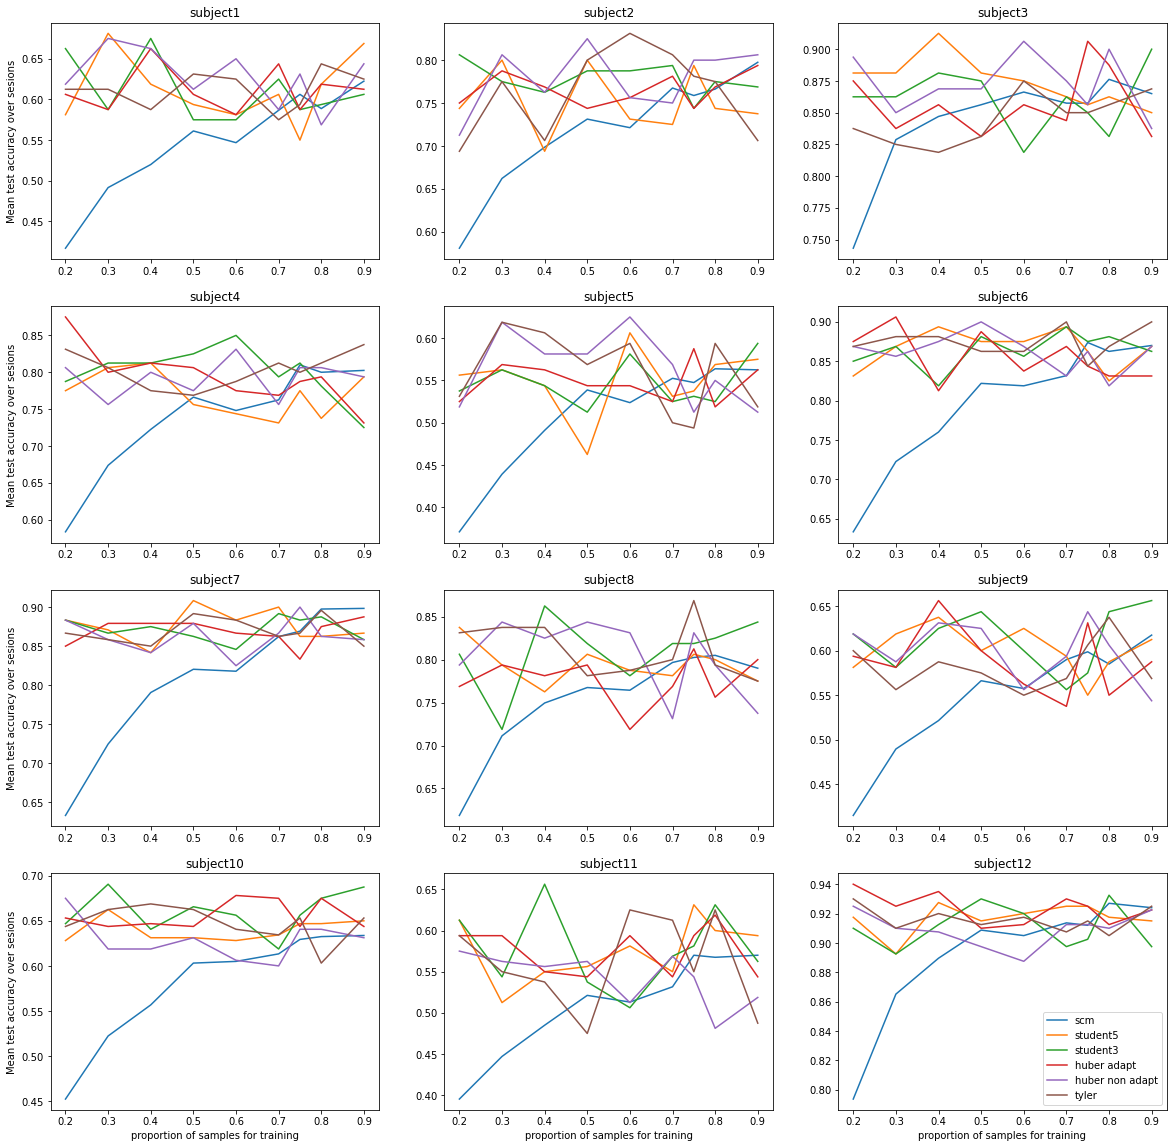

In [60]:
#plot
df = pd.DataFrame(results1)
estimators = ["scm","student5","student3","huber adapt","huber non adapt","tyler"]
s = len(train_props)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flatten()
all_subjects = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(train_props))]
        all_subjects[(i,k)] = y
        axs[i].plot(train_props,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("proportion of samples for training")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()
        

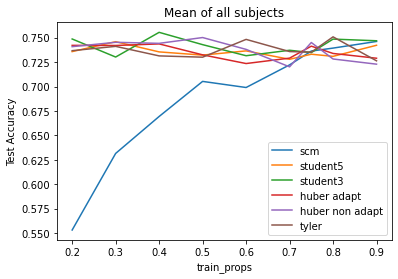

In [61]:
mean_acc = [[all_subjects[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(train_props,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("train_props")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

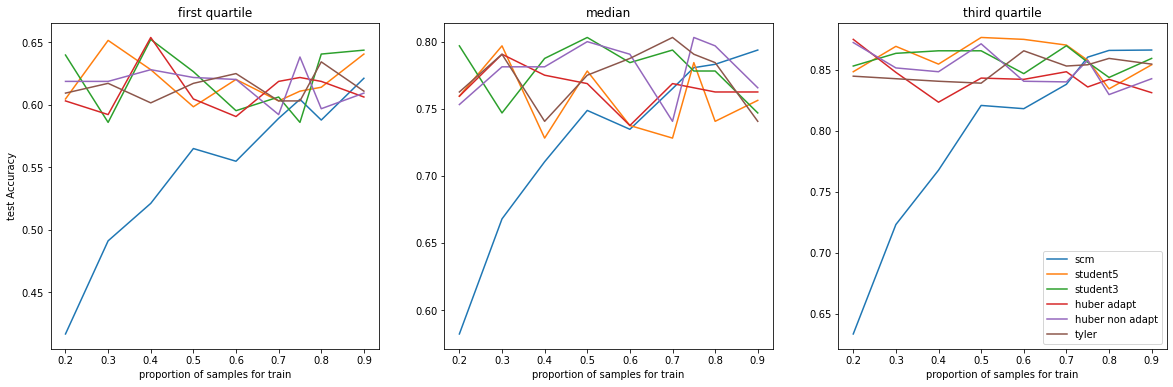

In [63]:
quartiles = np.zeros((3,len(estimators),len(train_props)))

for k in range(len(train_props)):
    for j in range(len(estimators)):
        y = mean_acc[:,j,k]
        q1,m,q2 = np.percentile(y, [25, 50, 75])
        quartiles[1,j,k] = m
        quartiles[0,j,k] = q1
        quartiles[2,j,k] = q2

quart = ["first quartile","median","third quartile"]
        
fig,axs = plt.subplots(1,3,figsize=(20,6))
axs = axs.flatten()
for i in range(3):
    for j in range(len(estimators)):
        axs[i].plot(train_props,[quartiles[i,j,k] for k in range(len(train_props))],label = estimators[j])
        axs[i].set_title(quart[i])
        axs[i].set_xlabel("proportion of samples for train")
axs[0].set_ylabel('test Accuracy')
    
plt.legend()

## 3- Effect of the window size (the offset is fixed at 2s)

In [43]:
results2 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
tmax=5
tmin = 2
nb_trains = 0
tmaxes = [3,3.25,3.5,3.75,4.25,4.5,4.75,5]

for subject in range(len(subj_list)):
    
    print("--------------",subj_list[subject],"--------------")
    for tmax in tmaxes:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="scm")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=50)
        train_acc1,test_acc1 = classif1.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"scm")
        print("scm done")
        
        COVS2 = Covariances(estimator="student",ddl=5)
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"student5")
        print("student5 done")
        
        COVS2bis = Covariances(estimator="student",ddl=3)
        COVS2bis.fit(extended_trials,labels)
        covs2bis = COVS2bis.transform(extended_trials)
        classif2bis = Classify(method,covs2bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2bis,test_acc2bis = classif2bis.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc2bis,test_acc2bis,nb_trains,"student3")
        print("student3 done")
        
        COVS4 = Covariances(estimator="huber",adaptive=True)
        COVS4.fit(extended_trials,labels)
        covs4 = COVS4.transform(extended_trials)
        classif4 = Classify(method,covs4,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4,test_acc4 = classif4.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc4,test_acc4,nb_trains,"huber adapt")
        print("huber adaptive done")
        
        COVS4bis = Covariances(estimator="huber",adaptive=False)
        COVS4bis.fit(extended_trials,labels)
        covs4bis = COVS4bis.transform(extended_trials)
        classif4bis = Classify(method,covs4bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4bis,test_acc4bis = classif4bis.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc4bis,test_acc4bis,nb_trains,"huber non adapt")
        print("huber non adaptive done")
        
        COVS3 = Covariances(estimator="tyler",adaptive=True)
        COVS3.fit(extended_trials,labels)
        covs3 = COVS3.transform(extended_trials)
        classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc3,test_acc3 = classif3.accuracies()
        results2 = fill_dict(results2,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler")
        print("tyler done")
         

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs


Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done

Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
t

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject06/subject06_r

Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening 

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
I

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Re

Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Open

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
tyler done
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
R

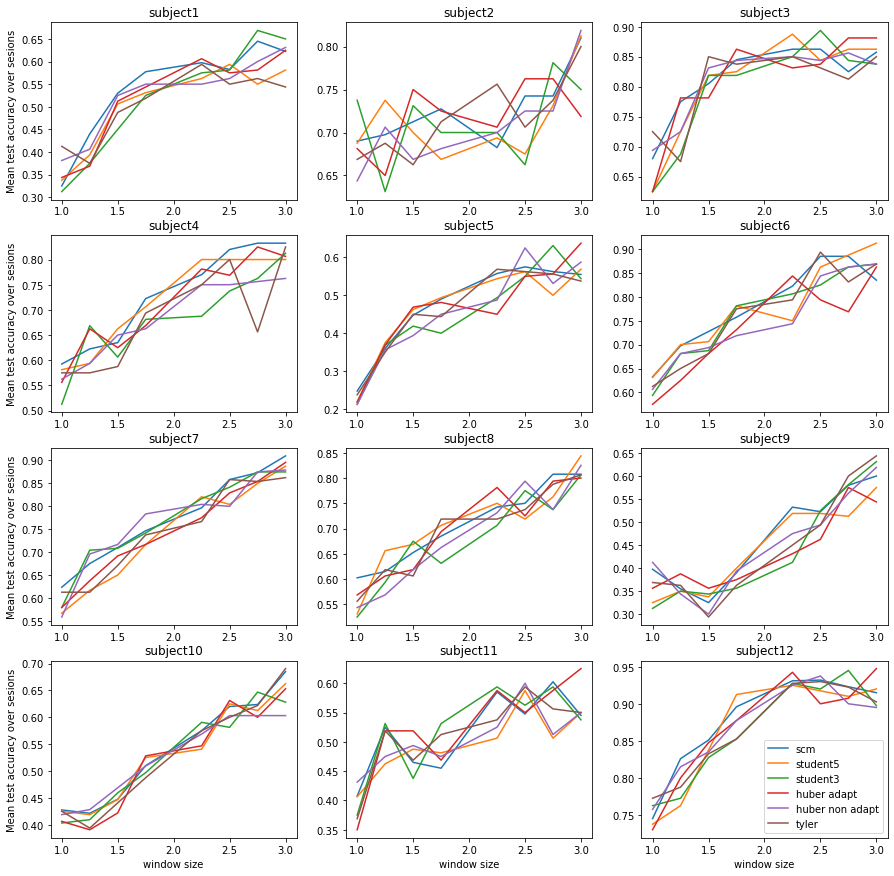

In [64]:
#plot
df = pd.DataFrame(results2)
estimators = ["scm","student5","student3","huber adapt","huber non adapt","tyler"]
s = len(tmaxes)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(15,15))
axs = axs.flatten()
w_sizes = [tmax - tmin for tmax in tmaxes]
all_subjects = {(i,k): [] for i in  range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df.loc[len(estimators)*j+k+s*i].at["mean test score"] for j in range(len(tmaxes))]
        all_subjects[(i,k)] = y
        axs[i].plot(w_sizes,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        if i>8:
            axs[i].set_xlabel("window size")
        if i%3==0:
            axs[i].set_ylabel("Mean test accuracy over sesions")
plt.legend()
        

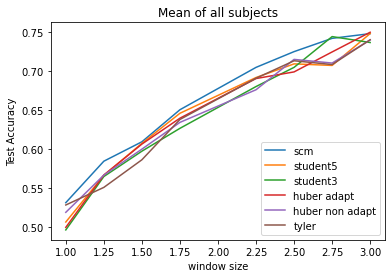

In [65]:
mean_acc = [[all_subjects[(i,k)] for k in range(len(estimators))] for i in range(len(axs))]
mean_acc = np.asarray(mean_acc)

y = np.mean(mean_acc,axis=0)

for  k in range(len(estimators)):    
    plt.plot(w_sizes,y[k],label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("window size")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

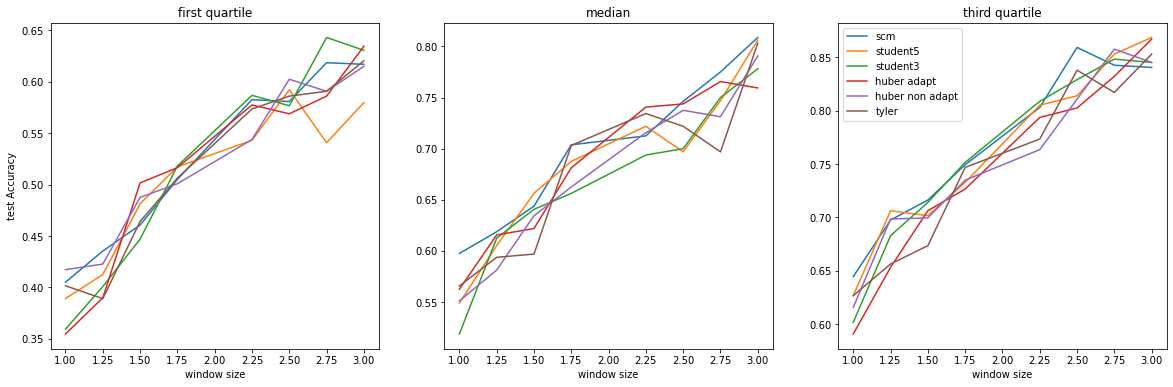

In [66]:
quartiles = np.zeros((3,len(estimators),len(tmaxes)))

for k in range(len(tmaxes)):
    for j in range(len(estimators)):
        y = mean_acc[:,j,k]
        q1,m,q2 = np.percentile(y, [25, 50, 75])
        quartiles[1,j,k] = m
        quartiles[0,j,k] = q1
        quartiles[2,j,k] = q2

quart = ["first quartile","median","third quartile"]
        
fig,axs = plt.subplots(1,3,figsize=(20,6))
axs = axs.flatten()
for i in range(3):
    for j in range(len(estimators)):
        axs[i].plot(w_sizes,[quartiles[i,j,k] for k in range(len(tmaxes))],label = estimators[j])
        axs[i].set_title(quart[i])
        axs[i].set_xlabel("window size")
axs[0].set_ylabel('test Accuracy')
    
plt.legend()